In [1]:
import pandas as pd #import libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df =pd.read_csv('C:/Users/HP/Documents/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [4]:
df.columns=df.columns.str.strip()

In [5]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [6]:
print(df.shape)
print(df.info())

(54, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       54 non-null     object
 1   race/ethnicity               54 non-null     object
 2   parental level of education  54 non-null     object
 3   lunch                        54 non-null     object
 4   test preparation course      54 non-null     object
 5   math score                   54 non-null     int64 
 6   reading score                54 non-null     int64 
 7   writing score                54 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 3.5+ KB
None


In [7]:
df.rename(columns={'race ethnicity':'race_ethnicity'},inplace=True)

In [8]:
print(df.head())
print(df.info())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 


In [9]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder #data preprocessing
le = LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['race/ethnicity']=le.fit_transform(df['race/ethnicity'])
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['lunch']=le.fit_transform(df['lunch'])
df['test preparation course']=le.fit_transform(df['test preparation course'])


In [11]:
x=df.drop(['math score'],axis=1) #deine features & target variable
y=df['math score']

In [12]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # split data into train & testing

In [13]:
dt_model=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
y_pred=dt_model.predict((x_test)) #model evaluation
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy:.2f}")
print(classification_report(y_test,y_pred))

Model Accuracy:0.00
              precision    recall  f1-score   support

          18       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       0.0
          47       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
          53       0.00      0.00      0.00       1.0
          54       0.00      0.00      0.00       1.0
          55       0.00      0.00      0.00       0.0
          56       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       1.0
          65       0.00      0.00      0.00       1.0
          66       0.00      0.00      0.00       0.0
          67       0.00      0.00      0.00       0.0
          69       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          82       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       0.0

    ac

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
from sklearn.tree import DecisionTreeClassifier 
dt_model=DecisionTreeClassifier() 
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
print(x.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score'],
      dtype='object')


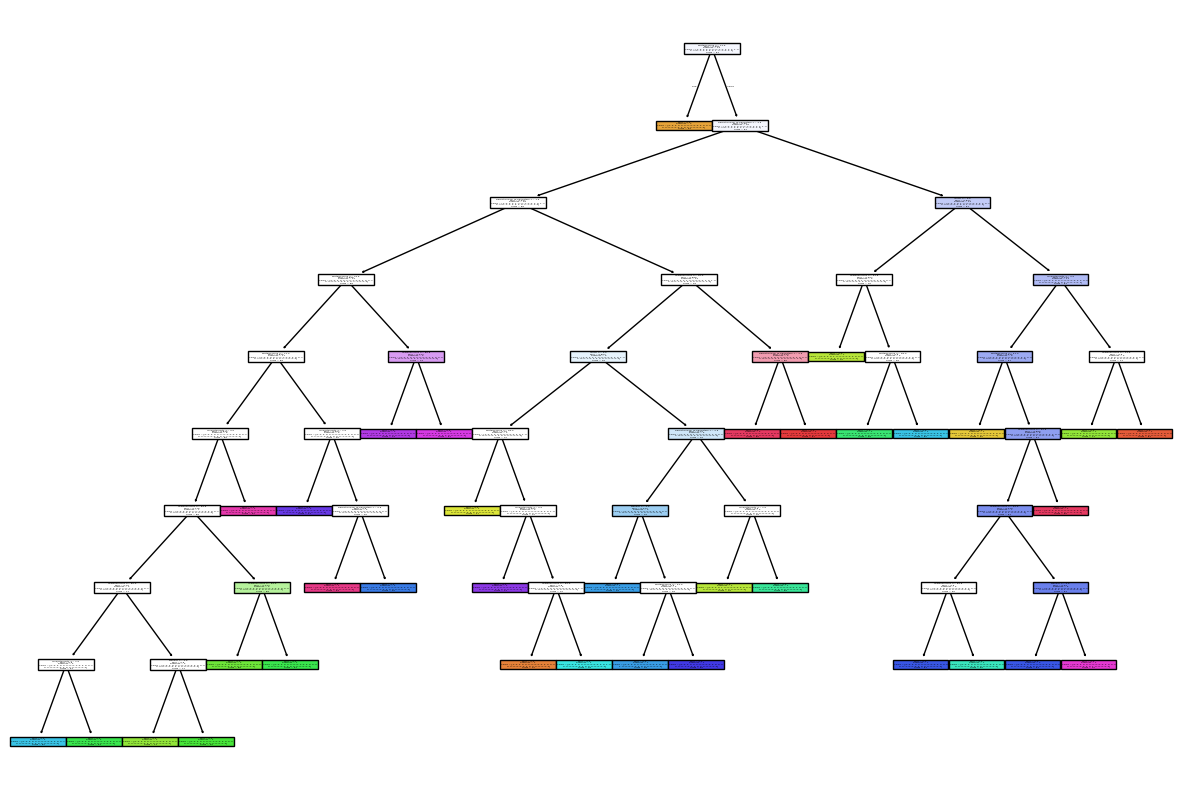

In [17]:
import matplotlib.pyplot as plt #visualize decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
if hasattr(dt_model,"tree_"):class_labels=[str(label)for label in y.unique()]
plot_tree(dt_model,feature_names=x.columns,class_names=class_labels,filled=True)
plt.show()
